In [1]:
%load_ext zipline
%matplotlib inline

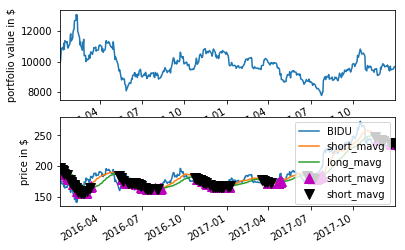

,BIDU,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,184.03,NaN,0.000000,NaN,-0.013979,NaN,NaN,0.000000,10000.000000,0.00,...,197.914500,0.00,0,NaN,10000.000000,0.00,0.00,1,[],0.0224
2016-01-05 21:00:00+00:00,187.37,0.001122,-0.000100,-0.022480,-0.012312,0.175904,-0.006381,10116.980000,20116.980000,-10117.98,...,196.742000,-10117.98,1,-11.224972,10000.000000,0.00,0.00,2,"[{'dt': 2016-01-05 21:00:00+00:00, 'order_id':...",0.0225
2016-01-06 21:00:00+00:00,185.61,0.087576,0.009404,0.207044,-0.024771,0.137796,-0.278695,0.000000,20116.980000,-10022.94,...,195.695500,-10022.94,1,861.977724,20116.980000,-10117.98,-10117.98,3,[],0.0218
2016-01-07 21:00:00+00:00,174.37,0.458004,0.070100,-2.165994,-0.048168,0.167837,-2.125346,0.000000,20116.980000,-9415.98,...,194.549000,-9415.98,1,5519.206419,20116.980000,-10022.94,-10022.94,4,[],0.0216
2016-01-08 21:00:00+00:00,171.34,0.396947,0.086362,-2.138524,-0.058616,0.145620,-2.123974,1198.380000,21315.360000,-10451.74,...,193.016500,-10451.74,1,6015.387441,20116.980000,-9415.98,-9415.98,5,"[{'dt': 2016-01-08 21:00:00+00:00, 'order_id':...",0.0213
2016-01-11 21:00:00+00:00,170.37,0.362901,0.092179,-0.575243,-0.057684,0.154994,-1.762607,339.740000,21655.100000,-10733.31,...,191.560500,-10733.31,1,5838.287948,21315.360000,-10451.74,-10451.74,6,"[{'dt': 2016-01-11 21:00:00+00:00, 'order_id':...",0.0217
2016-01-12 21:00:00+00:00,172.91,0.376332,0.076077,-0.446082,-0.050081,0.177568,-1.726654,171.910000,21827.010000,-11066.24,...,190.078500,-11066.24,1,30.662145,21655.100000,-10733.31,-10733.31,7,"[{'dt': 2016-01-12 21:00:00+00:00, 'order_id':...",0.0212
2016-01-13 21:00:00+00:00,166.04,0.386975,0.119945,-0.443688,-0.073772,0.192027,-1.718693,-167.040000,21659.970000,-10460.52,...,189.040000,-10460.52,1,44.200812,21827.010000,-11066.24,-11066.24,8,"[{'dt': 2016-01-13 21:00:00+00:00, 'order_id':...",0.0208
2016-01-14 21:00:00+00:00,172.23,0.446572,0.080848,-0.698256,-0.058567,0.225892,-1.788771,687.920000,22347.890000,-11539.41,...,187.647500,-11539.41,1,11.338418,21659.970000,-10460.52,-10460.52,9,"[{'dt': 2016-01-14 21:00:00+00:00, 'order_id':...",0.0210
2016-01-15 21:00:00+00:00,163.92,0.471769,0.136425,-0.536923,-0.078776,0.225682,-1.904988,-656.680000,21691.210000,-10326.96,...,186.302500,-10326.96,1,17.568102,22347.890000,-11539.41,-11539.41,10,"[{'dt': 2016-01-15 21:00:00+00:00, 'order_id':...",0.0203


In [7]:
%%zipline --start 2016-1-1 --end 2018-1-1 -b quantopian-quandl --capital-base 10000

from zipline.api import symbol, record, order_target_percent
import matplotlib.pyplot as plt

sym = 'BIDU'
def initialize(context):
    context.sym = symbol(sym)
    
def handle_data(context, data):
    record(BIDU=data[context.sym].price)
    
    # take the average of the previous 40 days (exclude the current day)
    long_mavg = data.history(context.sym, 'close', 41, '1d')[:-1].mean()
    short_mavg = data.history(context.sym, 'close', 21, '1d')[:-1].mean()
    
    record(long_mavg=long_mavg)
    record(short_mavg=short_mavg)
    
    # need to check whether the security is tradable - 
    #     it may be halted due to some event
    if short_mavg > long_mavg and data.can_trade(context.sym):
        # allocate %100 of our stock to amzn
        order_target_percent(context.sym, 1.00)
    else:
        if short_mavg < long_mavg and data.can_trade(context.sym):
            order_target_percent(context.sym, -1.00)
        
def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')
    
    ax2 = fig.add_subplot(212)
    perf[sym].plot(ax=ax2, label=sym)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)
    
    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    
    plt.legend(loc=0)
    plt.show()